In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# loading data
df=pd.read_csv(r"Book.csv")
print(df.head(10))

         isbn13      isbn10                   title  \
0  9.780000e+12     2005883                  Gilead   
1  9.780000e+12     2261987            Spider's Web   
2  9.780010e+12     6163831            The One Tree   
3  9.780010e+12     6178731          Rage of angels   
4  9.780010e+12     6280897          The Four Loves   
5  9.780010e+12     6280935     The Problem of Pain   
6  9.780010e+12     6353282        An Autobiography   
7  9.780010e+12     6380832  Empires of the Monsoon   
8  9.780010e+12  000647022X    The Gap Into Madness   
9  9.780010e+12     6472613      Master of the Game   

                                         subtitle  \
0                                             NaN   
1                                         A Novel   
2                                             NaN   
3                                             NaN   
4                                             NaN   
5                                             NaN   
6                      

In [3]:
# info 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          2999 non-null   float64
 1   isbn10          2999 non-null   object 
 2   title           2999 non-null   object 
 3   subtitle        984 non-null    object 
 4   authors         2980 non-null   object 
 5   categories      2964 non-null   object 
 6   thumbnail       2869 non-null   object 
 7   description     2914 non-null   object 
 8   published_year  2996 non-null   float64
 9   average_rating  2980 non-null   float64
 10  num_pages       2980 non-null   float64
 11  ratings_count   2980 non-null   float64
 12  Price_INR       2999 non-null   float64
dtypes: float64(6), object(7)
memory usage: 304.7+ KB
None


In [4]:
# Describe function
print(df.describe())

             isbn13  published_year  average_rating    num_pages  \
count  2.999000e+03     2996.000000      2980.00000  2980.000000   
mean   9.780258e+12     1998.127503         3.92805   373.238926   
std    1.425520e+08       10.792957         0.29145   257.894566   
min    9.780000e+12     1876.000000         0.00000     0.000000   
25%    9.780140e+12     1996.000000         3.78000   230.000000   
50%    9.780310e+12     2002.000000         3.95000   321.000000   
75%    9.780390e+12     2005.000000         4.12000   433.000000   
max    9.780450e+12     2019.000000         5.00000  3342.000000   

       ratings_count     Price_INR  
count   2.980000e+03   2999.000000  
mean    2.974682e+04    588.493545  
std     1.819907e+05    486.138289  
min     0.000000e+00    408.310000  
25%     2.920000e+02    416.670000  
50%     1.821000e+03    441.710000  
75%     9.319500e+03    526.050000  
max     5.629932e+06  12201.850000  


In [5]:
df.isnull().sum()
df.dropna()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,Price_INR
1,9.780000e+12,2261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,416.67
7,9.780010e+12,6380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,1666.66
8,9.780010e+12,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,416.67
25,9.780010e+12,6499627,Miss Marple,The Complete Short Stories,Agatha Christie,"Detective and mystery stories, English",http://books.google.com/books/content?id=a96qP...,"Miss Marple featured in 20 short stories, publ...",1997.0,4.20,359.0,6235.0,733.96
34,9.780010e+12,6551815,'Tis,A Memoir,Frank McCourt,Ireland,http://books.google.com/books/content?id=Q3BhQ...,FROM THE PULIZER PRIZE-WINNING AUTHOR OF THE #...,2000.0,3.68,495.0,44179.0,441.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,9.780450e+12,451163931,The Virtue of Selfishness,A New Concept of Egoism,Ayn Rand;Nathaniel Branden,Philosophy,http://books.google.com/books/content?id=vtGzo...,Presents a collection of essays that sets fort...,1964.0,3.50,176.0,11122.0,416.67
2977,9.780450e+12,451166582,The Eyes of the Dragon,A Story,Stephen King,Fiction,http://books.google.com/books/content?id=dWMsE...,"After Flagg, the evil court magician, sees a m...",1988.0,3.93,380.0,2849.0,441.71
2979,9.780450e+12,451169514,It,A Novel,Stephen King,Fiction,http://books.google.com/books/content?id=kJtLV...,A group of teenagers stumbles upon an evil for...,1990.0,4.23,1090.0,293877.0,416.67
2993,9.780450e+12,451206703,Blessings from the Other Side,Wisdom and Comfort from the Afterlife for This...,Sylvia Browne;Lindsay Harrison,"Body, Mind & Spirit",http://books.google.com/books/content?id=IWqaA...,The noted psychic assembles a collection of re...,2002.0,3.95,208.0,38.0,416.67


In [6]:
df.duplicated()
df.drop_duplicates()


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,Price_INR
0,9.780000e+12,2005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,733.96
1,9.780000e+12,2261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,416.67
2,9.780010e+12,6163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,416.67
3,9.780010e+12,6178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,416.67
4,9.780010e+12,6280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,444.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,9.780450e+12,451207149,The pillars of the earth,NaN,Ken Follett,Fiction,http://books.google.com/books/content?id=HdTZA...,"A story of passion and idealism, which describ...",2002.0,4.31,973.0,530446.0,451.74
2995,9.780450e+12,451207351,The Love You Make,An Insider's Story of the Beatles,Peter Brown;Steven S. Gaines,Biography & Autobiography,http://books.google.com/books/content?id=KNhjq...,A close friend and business manager for the le...,1983.0,4.09,464.0,2438.0,748.16
2996,9.780450e+12,451207505,Trapped,NaN,Greg Iles,Fiction,http://books.google.com/books/content?id=mNQnP...,When a psychopathic con man kidnaps Will and K...,2002.0,3.99,434.0,313.0,441.71
2997,9.780450e+12,451207521,Jackdaws,NaN,Ken Follett,Fiction,http://books.google.com/books/content?id=mCJ3v...,With the Allies preparing for the invasion of ...,2002.0,3.95,496.0,352.0,441.71


In [7]:



# Basic cleanup
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce')
df['published_year'] = pd.to_numeric(df['published_year'], errors='coerce')
df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')

# Set Seaborn style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

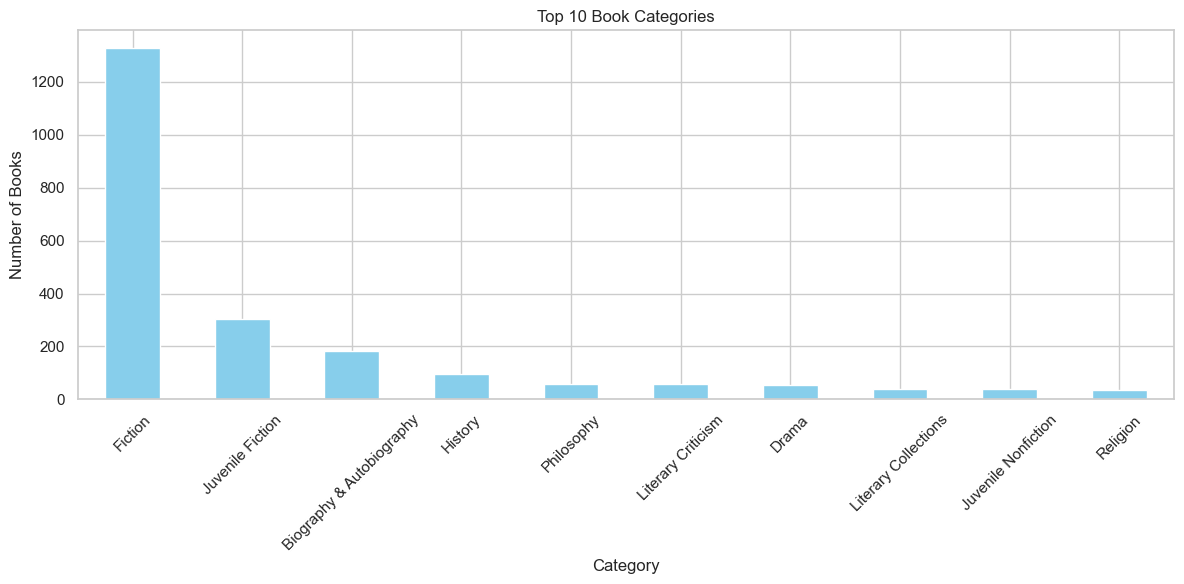

In [8]:
# 1. Top 10 Categories by Count
plt.figure(figsize=(12, 6))
df['categories'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Book Categories")
plt.ylabel("Number of Books")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

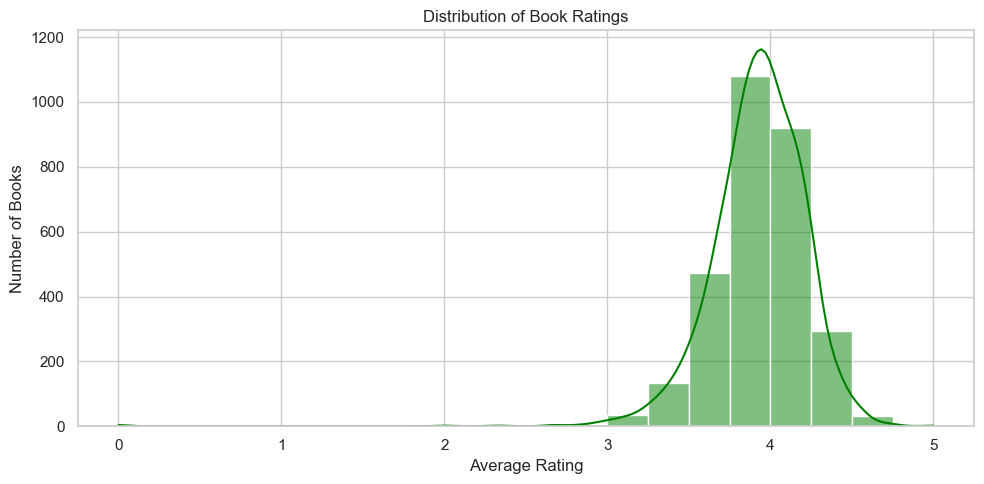

In [9]:
# 2. Distribution of Average Ratings
plt.figure(figsize=(10, 5))
sns.histplot(df['average_rating'].dropna(), bins=20, kde=True, color='green')
plt.title("Distribution of Book Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.show()

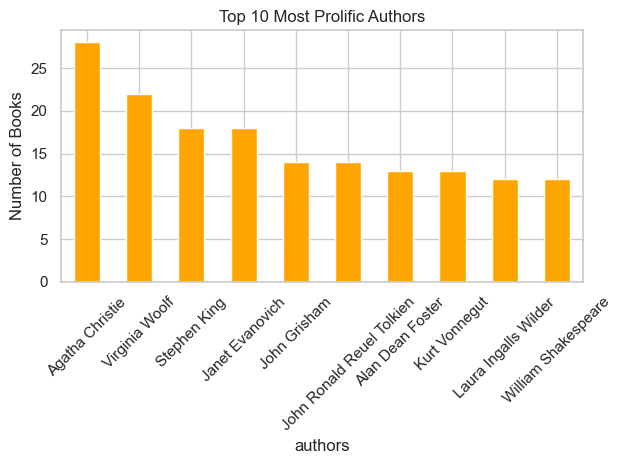

In [10]:
# 3. Most Prolific Authors (Top 10)
top_authors = df['authors'].value_counts().head(10)
top_authors.plot(kind='bar', color='orange')
plt.title("Top 10 Most Prolific Authors")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


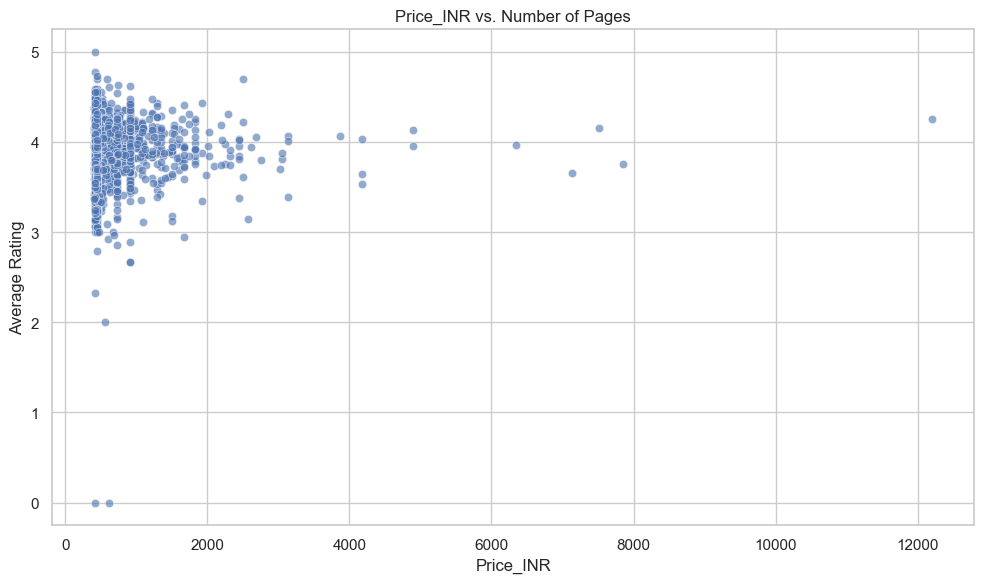

In [11]:
# 4. Ratings vs. Page Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price_INR', y='average_rating', data=df, alpha=0.6)
plt.title("Price_INR vs. Number of Pages")
plt.xlabel("Price_INR")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()


C:\Users\riyag\AppData\Local\Temp\ipykernel_23168\1473342301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_rating', y='title', data=top_rated, palette='mako')


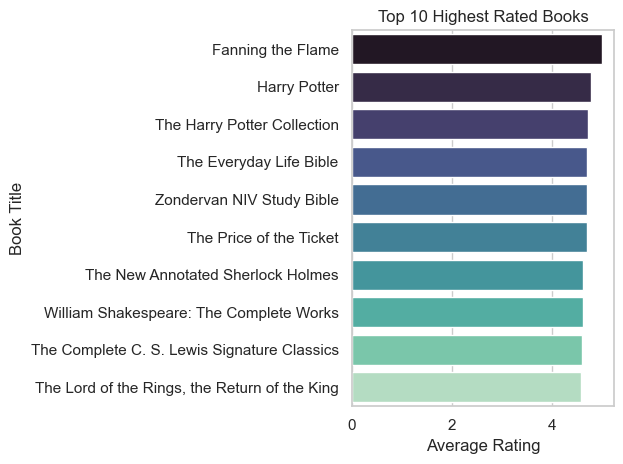

In [12]:
# 5. Top 10 Highest Rated Books
top_rated = df.sort_values(by='average_rating', ascending=False).head(10)
sns.barplot(x='average_rating', y='title', data=top_rated, palette='mako')
plt.title("Top 10 Highest Rated Books")
plt.xlabel("Average Rating")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()


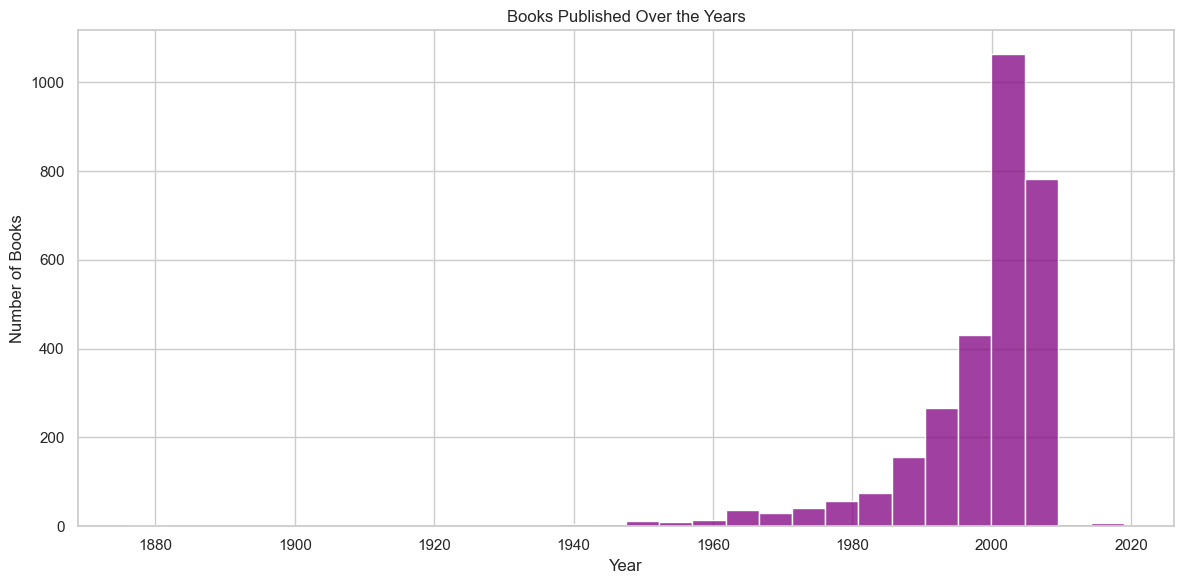

In [13]:
# 6. Books Published Over the Years
plt.figure(figsize=(12, 6))
sns.histplot(df['published_year'].dropna(), bins=30, kde=False, color='purple')
plt.title("Books Published Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.show()

In [18]:

# Convert columns to numeric
df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
df['ratings_count'] = pd.to_numeric(df['ratings_count'], errors='coerce')
df['num_pages'] = pd.to_numeric(df['num_pages'], errors='coerce')
df['published_year'] = pd.to_numeric(df['published_year'], errors='coerce')

# Drop rows with missing data
df_model = df[['ratings_count', 'num_pages', 'average_rating', 'published_year']].dropna()

# Features and target
X = df_model[['num_pages', 'average_rating', 'published_year']]
y = df_model['ratings_count']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Model Evaluation Metrics:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

predicted_popularity = model.predict(X_test)
print("\nPredicted Ratings Count (Popularity):", int(predicted_popularity[0]))

Model Evaluation Metrics:
Mean Absolute Error: 45520.63041297994
Mean Squared Error: 21255168264.87293
R² Score: 0.023608313374850032

Predicted Ratings Count (Popularity): 17940
